In [1]:
import cPickle as pickle
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os

In [3]:
RESULTS_DIR = '/n/regal/pfister_lab/PERCEPTION/RESULTS/'

In [6]:
for subdir, _, _ in os.walk(RESULTS_DIR+'/C.Figure3'):
    print subdir
    if len(subdir.split('/')) == 9:
      if len(os.listdir(subdir)) != 4:
        print subdir, len(os.listdir(subdir))
        
#         classifier = subdir.split('/')[-1]
#         dataset = subdir.split('/')[-2]
#         experiment = subdir.split('/')[-3]
        
#         print 'sbatch', experiment + '_' + dataset + '_' + classifier +'_True.sbatch'

In [ ]:
for f in *_XCEPTION_True.sbatch; do sbatch $f; done

In [18]:
import glob
import cPickle as pickle

In [115]:
experiment = 'C.Figure1.angle'
e_dir = os.path.join(RESULTS_DIR, experiment)
datasets = sorted(os.listdir(e_dir))

results = [None]*4

classifiers = ['MLP', 'LeNet', 'VGG19', 'XCEPTION']
for i,c in enumerate(classifiers):
    
    results[i] = []
    for d in datasets:
        d_dir = os.path.join(e_dir, d)

        stats_files = ['03_noise.p', '04_noise.p']#glob.glob(os.path.join(d_dir, c)+'/*.p')
        MLAEs = []

        for s in stats_files:

            with open(os.path.join(d_dir, c)+'/'+s, 'r') as f:
                stats = pickle.load(f)
            MLAEs.append(stats['MLAE'])
            
        results[i].append(MLAEs)
            
#         print d, c, np.mean([stats1['MLAE'], stats2['MLAE']])

In [116]:
results

[[[2.7253766601165266, 2.8096803161996626],
  [4.4449763133441538, 4.3396681739161673],
  [5.0325231808253834, 4.5547596825419143]],
 [[1.7975809878019353, 1.5491893653924598],
  [2.9174054981466879, 2.3409907352282753],
  [3.4120250038421158, 3.1797806452814772]],
 [[1.3306123448169238, 1.3591461828974047],
  [2.0136417154696002, 2.4762966511521589],
  [2.3657130377575895, 2.2913071677576071]],
 [[1.9473423802358294, 1.901398817002562],
  [2.4231211690738697, 2.2198943493338108],
  [2.7351373269257619, 2.5510833514829736]]]

In [62]:
results[0]

[[3.4371376507239724, 2.589734799307946],
 [4.9569597644077756, 4.9504569373217278],
 [4.9911288314507596, 4.7263080829480923]]

<Container object of 3 artists>

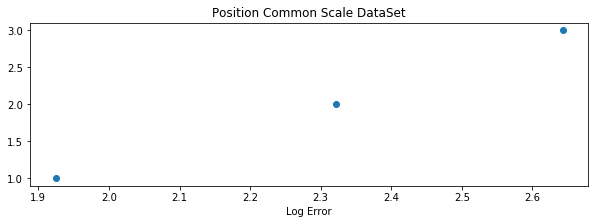

In [126]:

plt.figure(figsize=(10,3))
plt.title('Position Common Scale DataSet')
plt.xlabel('Classifier')
plt.xlabel('Log Error')

means = [np.mean(r) for r in results[3]]

plt.errorbar(means, [1,2,3], xerr=None, fmt='o')

# boxplot = plt.plot(results[0], '-')#, vert=False, notch=False, labels=[0,1,2], showfliers=False)

In [70]:
means

[3.0134362250159592, 4.9537083508647513, 4.8587184571994264]

In [72]:
x,y,yerr = rand(3,10)


In [78]:
means

[3.0134362250159592, 4.9537083508647513, 4.8587184571994264]

In [79]:
results[0]

[[3.4371376507239724, 2.589734799307946],
 [4.9569597644077756, 4.9504569373217278],
 [4.9911288314507596, 4.7263080829480923]]

In [81]:
np.std(results[0][0])

0.42370142570801317

In [121]:
import numpy as np, scipy.stats as st

cints = np.zeros((2, len(results[1])))

for z,r in enumerate(results[1]):
    print r
    m,i,j = mean_confidence_interval(r)
    cints[0,z] = i
    cints[1,z] = j

[1.7975809878019353, 1.5491893653924598]
[2.9174054981466879, 2.3409907352282753]
[3.4120250038421158, 3.1797806452814772]


In [123]:
cints

array([[ 0.09532777, -1.03282388,  1.82043064],
       [ 3.25144258,  6.29122011,  4.77137501]])

In [99]:
import numpy as np
import scipy as sp
import scipy.stats

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0*np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * sp.stats.t._ppf((1+confidence)/2., n-1)
    return m, m-h, m+h

In [103]:
mean_confidence_interval(results[0][1])

(4.9537083508647513, 4.912395224704281, 4.9950214770252215)

In [104]:
results[0]

[[3.4371376507239724, 2.589734799307946],
 [4.9569597644077756, 4.9504569373217278],
 [4.9911288314507596, 4.7263080829480923]]